<a href="https://colab.research.google.com/github/KrunalKayasth26/k_shortest_paths/blob/main/k_shortest_Path_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import itertools
import pandas as pd
from google.colab import files
import random

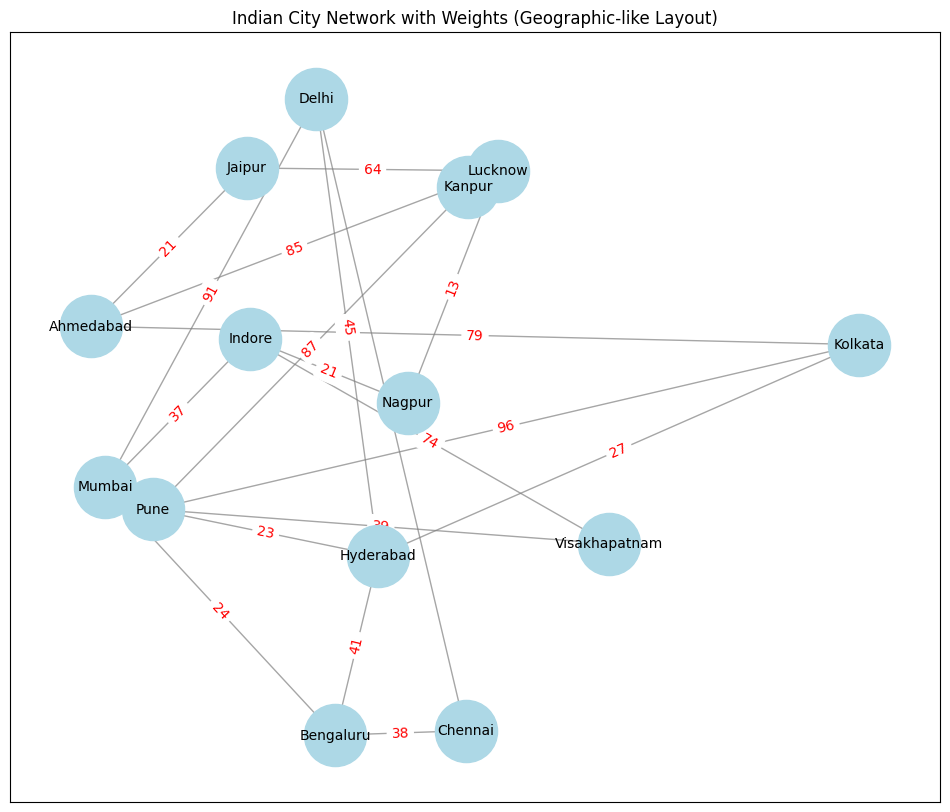

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = [
    "Mumbai", "Delhi", "Bengaluru", "Chennai",
    "Kolkata", "Hyderabad", "Ahmedabad", "Pune",
    "Jaipur", "Lucknow", "Kanpur", "Nagpur",
    "Visakhapatnam", "Indore"
]

edges = [
    ("Mumbai", "Delhi", 91),
    ("Mumbai", "Bengaluru", 24),
    ("Delhi", "Chennai", 13),
    ("Delhi", "Hyderabad", 45),
    ("Bengaluru", "Hyderabad", 41),
    ("Bengaluru", "Chennai", 38),
    ("Hyderabad", "Kolkata", 27),
    ("Hyderabad", "Pune", 23),
    ("Kolkata", "Pune", 96),
    ("Kolkata", "Ahmedabad", 79),
    ("Ahmedabad", "Jaipur", 21),
    ("Ahmedabad", "Lucknow", 85),
    ("Jaipur", "Lucknow", 64),
    ("Lucknow", "Kanpur", 14),
    ("Lucknow", "Nagpur", 13),
    ("Pune", "Kanpur", 87),
    ("Pune", "Visakhapatnam", 39),
    ("Visakhapatnam", "Indore", 74),
    ("Nagpur", "Indore", 21),
    ("Indore", "Mumbai", 37)
]

G = nx.Graph()
G.add_nodes_from(nodes)
for u, v, w in edges:
    G.add_edge(u, v, weight=w)
#For network or USNet , Normal standard graph is enough but for better undertanding and visualization i took cities name as nodes.
# Approximate geographic coordinates for Indian cities to resemble a map
# These are not exact but i have  chosen them to provide a more map-like layout
# Latitude (y-axis) and Longitude (x-axis) for better visual representation
geo_pos = {
    "Mumbai": (72.87, 19.07),
    "Delhi": (77.20, 28.61),
    "Bengaluru": (77.59, 12.97),
    "Chennai": (80.27, 13.08),
    "Kolkata": (88.36, 22.57),
    "Hyderabad": (78.48, 17.38),
    "Ahmedabad": (72.57, 23.02),
    "Pune": (73.85, 18.52),
    "Jaipur": (75.78, 26.91),
    "Lucknow": (80.94, 26.84),
    "Kanpur": (80.33, 26.44),
    "Nagpur": (79.08, 21.14),
    "Visakhapatnam": (83.21, 17.68),
    "Indore": (75.85, 22.71)
}

# Scale the coordinates for better visualization in matplotlib
# Find min/max for scaling (optional, but can help with plot size)
min_lon = min(lon for lon, lat in geo_pos.values())
max_lon = max(lon for lon, lat in geo_pos.values())
min_lat = min(lat for lon, lat in geo_pos.values())
max_lat = max(lat for lon, lat in geo_pos.values())

# Normalize coordinates to fit within a typical plot range, e.g., 0-1
# This ensures the map doesn't look too stretched or compressed initially
scaled_pos = {
    city: ( (lon - min_lon) / (max_lon - min_lon), (lat - min_lat) / (max_lat - min_lat) )
    for city, (lon, lat) in geo_pos.items()
}

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, scaled_pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, scaled_pos, font_size=10)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, scaled_pos, width=1.0, alpha=0.7, edge_color='gray')
nx.draw_networkx_edge_labels(G, scaled_pos, edge_labels=edge_labels, font_color='red')

plt.title('Indian City Network with Weights (Geographic-like Layout)')
# plt.axis('off') # Hide axes
plt.show()

In [ ]:
def k_shortest_paths(graph, source, target, K):
    try:
        return list(
            itertools.islice(
                nx.shortest_simple_paths(graph, source, target, weight="weight"),
                K
            )
        )
    except nx.NetworkXNoPath:
        return []


In [ ]:
def path_cost(graph, path):
    return sum(
        graph[path[i]][path[i + 1]]["weight"]
        for i in range(len(path) - 1)
    )


In [ ]:
K = int(input("Enter the value of K (number of shortest paths): "))


Enter the value of K (number of shortest paths): 3


In [ ]:
rows = []

for source in G.nodes():
    for destination in G.nodes():
        if source == destination:
            continue

        paths = k_shortest_paths(G, source, destination, K)

        if not paths:
            rows.append({
                "Source": source,
                "Destination": destination,
                "Path Rank": None,
                "Path": "No path",
                "Total Cost": None
            })
            continue

        for idx, path in enumerate(paths, start=1):
            rows.append({
                "Source": source,
                "Destination": destination,
                "Path Rank": idx,
                "Path": " -> ".join(path),
                "Total Cost": path_cost(G, path)
            })


In [ ]:
df = pd.DataFrame(rows)


In [ ]:
csv_file = "all_pairs_k_shortest_paths.csv"
excel_file = "all_pairs_k_shortest_paths.xlsx"

df.to_csv(csv_file, index=False)
df.to_excel(excel_file, index=False)

print(" Files generated successfully!")
print(csv_file)
print(excel_file)


✅ Files generated successfully!
all_pairs_k_shortest_paths.csv
all_pairs_k_shortest_paths.xlsx


In [ ]:
files.download(csv_file)
files.download(excel_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>